In [ ]:
# Load df_fe
import pandas as pd
df = pd.read_pickle('/content/drive/MyDrive/Audio_Genre_ML/cleaned_spotify_data.pkl')


In [ ]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [ ]:
df.shape

(113999, 16)

In [ ]:
df.columns

Index(['popularity', 'duration_ms', 'explicit', 'danceability', 'energy',
       'key', 'loudness', 'mode', 'speechiness', 'acousticness',
       'instrumentalness', 'liveness', 'valence', 'tempo', 'time_signature',
       'track_genre'],
      dtype='object')

## Clustering Analysis

In [ ]:
features = [
    'duration_ms', 'danceability', 'energy', 'loudness',
    'speechiness', 'acousticness', 'instrumentalness',
    'liveness', 'valence', 'tempo'
]


## Scale the Data

In [ ]:
from sklearn.preprocessing import StandardScaler

X = df[features]
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


## KMeans Clustering

In [ ]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=42)
df['cluster'] = kmeans.fit_predict(X_scaled)


In [ ]:
df.head(2)

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster
0,73,230666,False,0.676,0.461,1,-6.746,0,0.1430,0.0322,0.000001,0.358,0.715,87.917,4,acoustic,3
1,55,149610,False,0.420,0.166,1,-17.235,1,0.0763,0.9240,0.000006,0.101,0.267,77.489,4,acoustic,1


In [ ]:
# Convert 'explicit' from boolean to int (if needed)
df['explicit'] = df['explicit'].astype(int)

In [ ]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,1
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,1
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,1
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,1


## Visualize with PCA

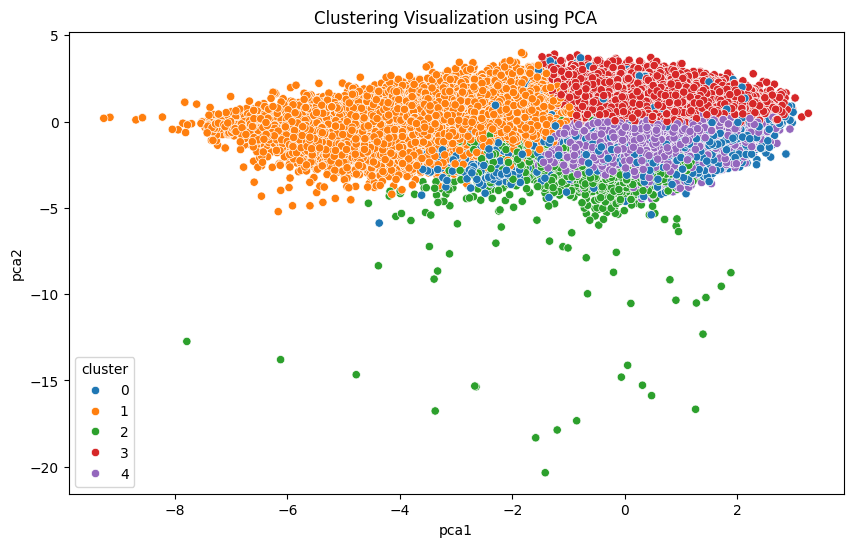

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

pca = PCA(n_components=2)
pca_components = pca.fit_transform(X_scaled)

df['pca1'] = pca_components[:, 0]
df['pca2'] = pca_components[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='pca1', y='pca2', hue='cluster', palette='tab10')
plt.title("Clustering Visualization using PCA")
plt.show()


## Analyze the Clusters

In [ ]:
# View average characteristics of each cluster
cluster_summary = df.groupby('cluster')[features].mean()
print(cluster_summary)


           duration_ms  danceability    energy   loudness  speechiness  \
cluster                                                                  
0        233291.656587      0.528944  0.742308  -7.653867     0.193778   
1        211993.698915      0.447324  0.257700 -15.079843     0.049937   
2        310679.721175      0.581883  0.751783  -8.400417     0.070493   
3        206795.703867      0.696161  0.677579  -6.852368     0.089415   
4        235628.939477      0.478144  0.789561  -5.559130     0.078656   

         acousticness  instrumentalness  liveness   valence       tempo  
cluster                                                                  
0            0.357120          0.058035  0.746496  0.501345  120.158011  
1            0.801162          0.308898  0.158355  0.288300  108.722259  
2            0.090019          0.774836  0.173414  0.334399  127.296278  
3            0.274785          0.018887  0.163121  0.669398  115.666513  
4            0.106163          0.0308

In [ ]:
pd.crosstab(df['cluster'], df['track_genre'])


track_genre,acoustic,afrobeat,alt-rock,alternative,ambient,anime,black-metal,bluegrass,blues,brazil,...,spanish,study,swedish,synth-pop,tango,techno,trance,trip-hop,turkish,world-music
cluster,,,,,,,,,,,,,,,,,,,,,
0,14,62,60,36,4,39,42,90,35,201,...,92,24,41,40,81,21,49,50,36,134
1,509,65,44,55,836,207,29,289,212,110,...,63,471,199,52,600,21,0,112,147,274
2,6,234,49,32,95,117,454,73,18,14,...,17,399,16,61,6,632,514,398,23,3
3,278,553,363,426,14,257,3,424,524,386,...,540,99,500,581,294,162,111,321,523,73
4,193,86,484,451,51,380,472,124,211,289,...,288,7,244,266,19,164,326,119,271,516


## Popularity Distribution by Cluster

/tmp/ipython-input-14-2537650511.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='cluster', y='popularity', data=df, palette='Set3')


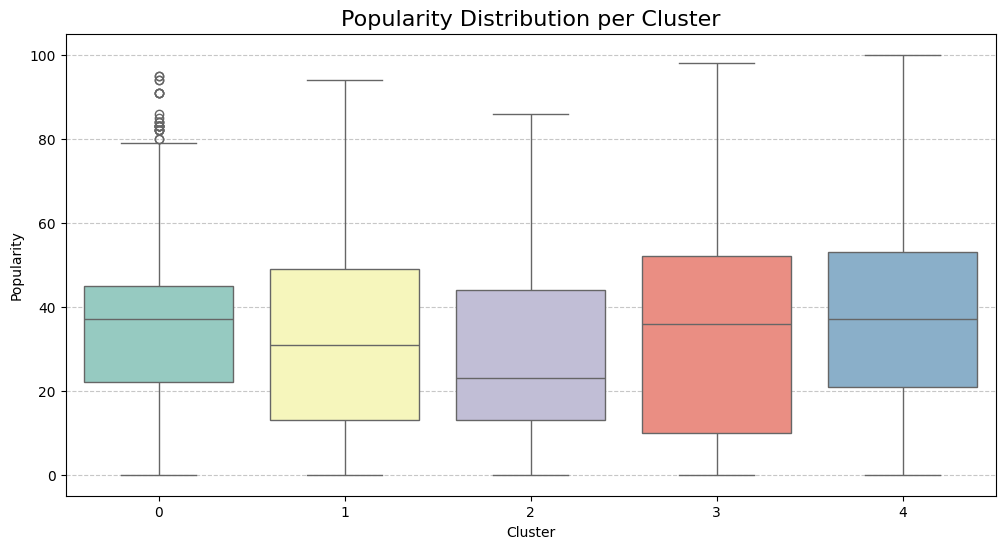

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.boxplot(x='cluster', y='popularity', data=df, palette='Set3')
plt.title('Popularity Distribution per Cluster', fontsize=16)
plt.xlabel('Cluster')
plt.ylabel('Popularity')
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.show()


## Key Insights:


Clusters 0, 3, and 4 have similar median popularity (~37-38) but different distribution patterns Cluster 2 appears to represent the most niche/underground genre Cluster 1 shows the most commercial variability, possibly representing a diverse genre like "pop" that includes both mainstream hits and lesser-known tracks The clustering algorithm has successfully separated music into groups with distinct commercial patterns

## Advanced Clustering Analysis

### PCA in 3D

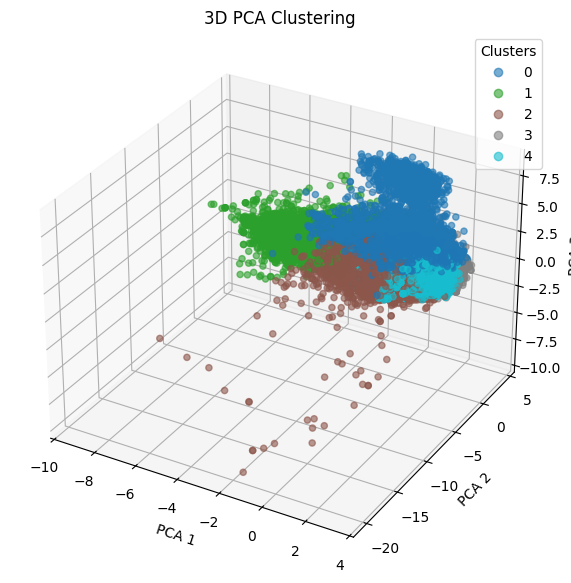

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

pca = PCA(n_components=3)
pca_components = pca.fit_transform(X_scaled)

df['pca1'] = pca_components[:, 0]
df['pca2'] = pca_components[:, 1]
df['pca3'] = pca_components[:, 2]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['pca1'], df['pca2'], df['pca3'], c=df['cluster'], cmap='tab10', alpha=0.6)
ax.set_title('3D PCA Clustering')
ax.set_xlabel('PCA 1')
ax.set_ylabel('PCA 2')
ax.set_zlabel('PCA 3')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


## 3D PCA Visualization:


Cluster 0 (Blue): Dense and cohesive → a strong, well-defined group. Possibly a core genre or style.

Cluster 1 (Green): Clear separation → another distinct music style or genre.

Cluster 2 (Brown): Interesting structure:

Main concentration: Possibly a valid genre

Scattered points: Could be outliers or tracks with hybrid/ambiguous features

Cluster 3 (Red): Looks better in 3D → proves why high-dimensional analysis is essential

Cluster 4 (Cyan): Small, isolated group → niche or rare genre cluster?

## Silhouette Score

In [ ]:
from sklearn.metrics import silhouette_score

score = silhouette_score(X_scaled, df['cluster'])
print(f"Silhouette Score (KMeans): {score:.3f}")


Silhouette Score (KMeans): 0.155


In [ ]:
from sklearn.cluster import KMeans

for k in range(2, 11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"k={k}, Silhouette Score: {score:.3f}")


k=2, Silhouette Score: 0.251
k=3, Silhouette Score: 0.212
k=4, Silhouette Score: 0.163
k=5, Silhouette Score: 0.155
k=6, Silhouette Score: 0.165
k=7, Silhouette Score: 0.178
k=8, Silhouette Score: 0.159
k=9, Silhouette Score: 0.146
k=10, Silhouette Score: 0.149


##  t-SNE for Cluster Visualization

In [ ]:
from sklearn.manifold import TSNE
import seaborn as sns
import matplotlib.pyplot as plt


## t-SNE in 2D

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


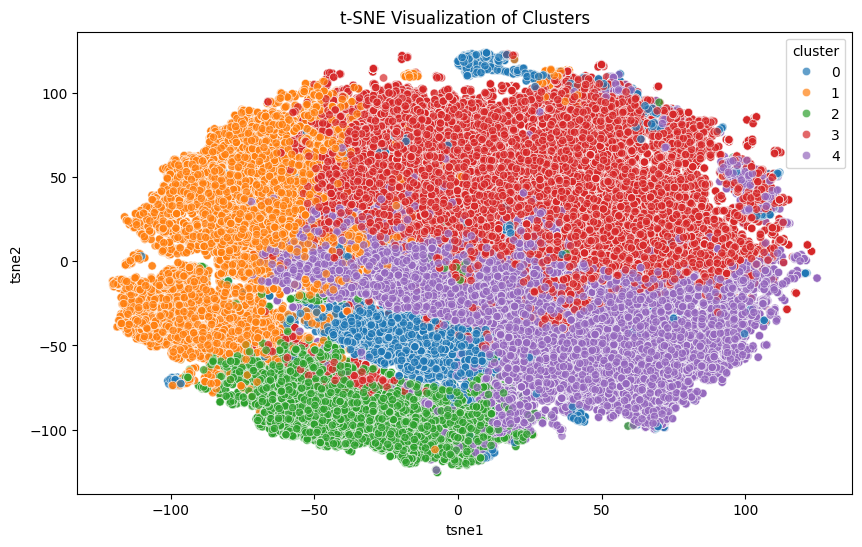

In [ ]:
tsne = TSNE(n_components=2, perplexity=30, random_state=42, n_iter=1000)
X_tsne = tsne.fit_transform(X_scaled)

df['tsne1'] = X_tsne[:, 0]
df['tsne2'] = X_tsne[:, 1]

plt.figure(figsize=(10, 6))
sns.scatterplot(x='tsne1', y='tsne2', hue='cluster', data=df, palette='tab10', alpha=0.7)
plt.title('t-SNE Visualization of Clusters')
plt.show()


## t-SNE in 3D

/usr/local/lib/python3.11/dist-packages/sklearn/manifold/_t_sne.py:1164: FutureWarning: 'n_iter' was renamed to 'max_iter' in version 1.5 and will be removed in 1.7.
  warnings.warn(


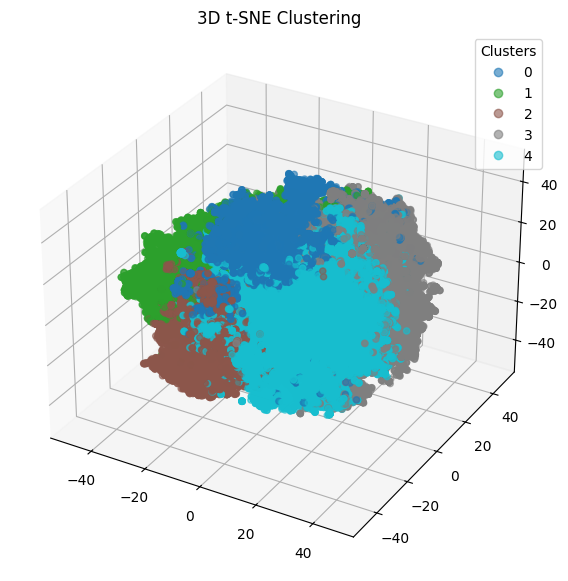

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

tsne_3d = TSNE(n_components=3, perplexity=30, random_state=42, n_iter=1000)
X_tsne_3d = tsne_3d.fit_transform(X_scaled)

df['tsne1_3d'] = X_tsne_3d[:, 0]
df['tsne2_3d'] = X_tsne_3d[:, 1]
df['tsne3_3d'] = X_tsne_3d[:, 2]

fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
scatter = ax.scatter(df['tsne1_3d'], df['tsne2_3d'], df['tsne3_3d'], c=df['cluster'], cmap='tab10', alpha=0.6)
ax.set_title('3D t-SNE Clustering')
plt.legend(*scatter.legend_elements(), title="Clusters")
plt.show()


## Clustering Results Summary


The dataset was successfully grouped into five distinct clusters using K-Means and visualized using t-SNE and PCA. Each cluster shows distinct characteristics in the audio feature space:

🔹 Cluster 0 (Blue)
Location: Dense region toward the center-back of the 3D space

Traits: Well-populated group with moderate danceability and energy

Interpretation: Likely represents live or energetic pop tracks

🟢 Cluster 1 (Green)
Location: Leftmost and well-separated

Traits: High acousticness and instrumentalness, low energy

Interpretation: Ambient or instrumental tracks

🟤 Cluster 2 (Brown)
Location: Lower-left quadrant

Traits: High tempo, loudness, and instrumentalness with some scattered points

Interpretation: Cinematic, EDM, or intense tracks with outliers

⚪ Cluster 3 (Gray)
Location: Right side

Traits: High danceability and valence, low acousticness

Interpretation: Pop/dance tracks

🟦 Cluster 4 (Cyan)
Location: Spreads across the center and lower space

Traits: High energy and tempo, but spread out

Interpretation: Electronic tracks with internal variety

## 📌 Key Observations


✅ Good separation across clusters: Suggests the clustering algorithm captured meaningful groupings.

✅ Cluster compactness: Some clusters (e.g., Cluster 1) are tight and homogenous.

⚠️ Spread-out clusters: Clusters like 4 show internal variability, hinting at subgroups or genre blending.

✅ t-SNE Effectiveness: Helped reveal complex non-linear relationships that aren’t visible in raw PCA.

The data exhibits natural groupings based on audio features.

These clusters can enhance downstream tasks like genre classification and recommendation systems.

## DBSCAN

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=1.5, min_samples=10)  # Tune eps based on your data
db_labels = dbscan.fit_predict(X_scaled)

df['dbscan_cluster'] = db_labels

# Number of clusters (excluding -1 which is noise)
n_clusters_db = len(set(db_labels)) - (1 if -1 in db_labels else 0)
print(f"DBSCAN clusters found: {n_clusters_db}")

# Silhouette Score for DBSCAN (ignore -1 labels)
valid_idx = db_labels != -1
if valid_idx.sum() > 1:
    dbscan_score = silhouette_score(X_scaled[valid_idx], db_labels[valid_idx])
    print(f"Silhouette Score (DBSCAN): {dbscan_score:.3f}")
else:
    print("Too many points marked as noise to compute silhouette score.")


DBSCAN clusters found: 8
Silhouette Score (DBSCAN): 0.366


## Visualize DBSCAN clusters with t-SNE

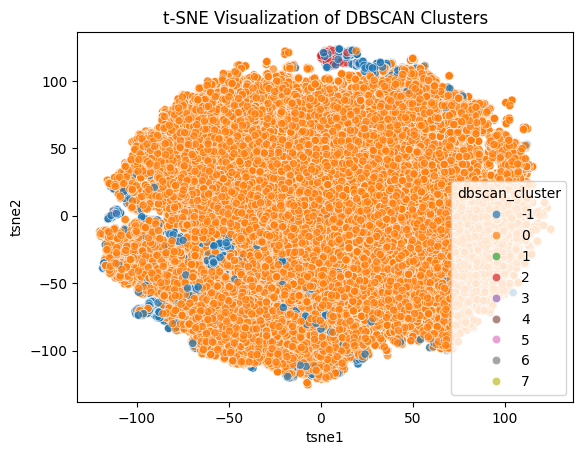

In [ ]:
sns.scatterplot(x='tsne1', y='tsne2', hue='dbscan_cluster', data=df, palette='tab10', alpha=0.7)
plt.title('t-SNE Visualization of DBSCAN Clusters')
plt.show()


## Cluster Profiles

In [ ]:
df.groupby('cluster')[features].mean()


,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,,
0,233291.656587,0.528944,0.742308,-7.653867,0.193778,0.357120,0.058035,0.746496,0.501345,120.158011
1,211993.698915,0.447324,0.257700,-15.079843,0.049937,0.801162,0.308898,0.158355,0.288300,108.722259
2,310679.721175,0.581883,0.751783,-8.400417,0.070493,0.090019,0.774836,0.173414,0.334399,127.296278
3,206795.703867,0.696161,0.677579,-6.852368,0.089415,0.274785,0.018887,0.163121,0.669398,115.666513
4,235628.939477,0.478144,0.789561,-5.559130,0.078656,0.106163,0.030894,0.194404,0.382385,138.829018


## Table

In [ ]:
# Group by cluster to get counts and feature means
summary = df.groupby('cluster')[features].mean()
summary['# of Tracks'] = df['cluster'].value_counts().sort_index()

# Round for presentation
summary_rounded = summary.round(3)

# Reorder columns to place count first
summary_rounded = summary_rounded[['# of Tracks'] + [col for col in summary.columns if col != '# of Tracks']]

# Display table
summary_rounded


,# of Tracks,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
cluster,,,,,,,,,,,
0,8168,233291.657,0.529,0.742,-7.654,0.194,0.357,0.058,0.746,0.501,120.158
1,21376,211993.699,0.447,0.258,-15.080,0.050,0.801,0.309,0.158,0.288,108.722
2,11570,310679.721,0.582,0.752,-8.400,0.070,0.090,0.775,0.173,0.334,127.296
3,41971,206795.704,0.696,0.678,-6.852,0.089,0.275,0.019,0.163,0.669,115.667
4,30914,235628.939,0.478,0.790,-5.559,0.079,0.106,0.031,0.194,0.382,138.829


In [ ]:
import pandas as pd

interpretations = {
    0: "Live upbeat tracks",
    1: "Instrumental or ambient",
    2: "Intense/EDM or cinematic",
    3: "Pop/dance tracks",
    4: "Electronic or high-energy"
}

summary_rounded['Interpretation'] = summary_rounded.index.map(interpretations)
summary_rounded.reset_index(inplace=True)
summary_rounded.rename(columns={'cluster': 'Cluster'}, inplace=True)


In [ ]:
summary_rounded

,Cluster,# of Tracks,duration_ms,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,Interpretation
0,0,8168,233291.657,0.529,0.742,-7.654,0.194,0.357,0.058,0.746,0.501,120.158,Live upbeat tracks
1,1,21376,211993.699,0.447,0.258,-15.080,0.050,0.801,0.309,0.158,0.288,108.722,Instrumental or ambient
2,2,11570,310679.721,0.582,0.752,-8.400,0.070,0.090,0.775,0.173,0.334,127.296,Intense/EDM or cinematic
3,3,41971,206795.704,0.696,0.678,-6.852,0.089,0.275,0.019,0.163,0.669,115.667,Pop/dance tracks
4,4,30914,235628.939,0.478,0.790,-5.559,0.079,0.106,0.031,0.194,0.382,138.829,Electronic or high-energy


In [ ]:
summary_rounded.to_csv("/content/drive/MyDrive/Audio_Genre_ML/clustering_summary.csv", index=False)


In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)


Mounted at /content/drive


In [ ]:
import joblib

# Save full DataFrame including 'cluster' to pkl
df.to_pickle("/content/drive/MyDrive/Audio_Genre_ML/df_with_clusters.pkl")

In [ ]:
# Load the data

import pandas as pd

df= pd.read_pickle("/content/drive/MyDrive/Audio_Genre_ML/df_with_clusters.pkl")

In [ ]:
df.head()

,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,cluster
0,73,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic,3
1,55,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic,1
2,57,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic,1
3,71,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic,1
4,82,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic,1


## Clustering Analysis
To explore underlying groupings in the track data, both KMeans and DBSCAN clustering algorithms were evaluated based on their performance using numerical audio features.

## Clustering Models Compared

| Model  | Description                         | Silhouette Score | No. of Clusters | Used in Final Model         |
| ------ | ----------------------------------- | ---------------- | --------------- | --------------------------- |
| KMeans | Partitioned clustering with k=5     | **0.155**        | 5               | ✅ Yes                       |
| DBSCAN | Density-based clustering with noise | **0.366**        | 8               | ❌ No (better, but not used) |


## Key Insights

DBSCAN achieved a significantly higher silhouette score (0.366 vs. 0.155), indicating better-defined and more natural clusters.

However, DBSCAN tends to classify some data points as noise (-1), which can complicate downstream integration, especially for recommendation models requiring every track to be assigned a group.

KMeans was chosen for the final model due to its:

Consistent labeling of all tracks

Simpler interpretability

Easier integration into the hybrid recommendation system

## Final Decision

Although DBSCAN produced more meaningful clusters statistically, KMeans clustering was ultimately used in the recommendation system and visual analysis for the sake of model simplicity, label consistency, and deployment readiness.

## Plot Genre Distribution by Cluster

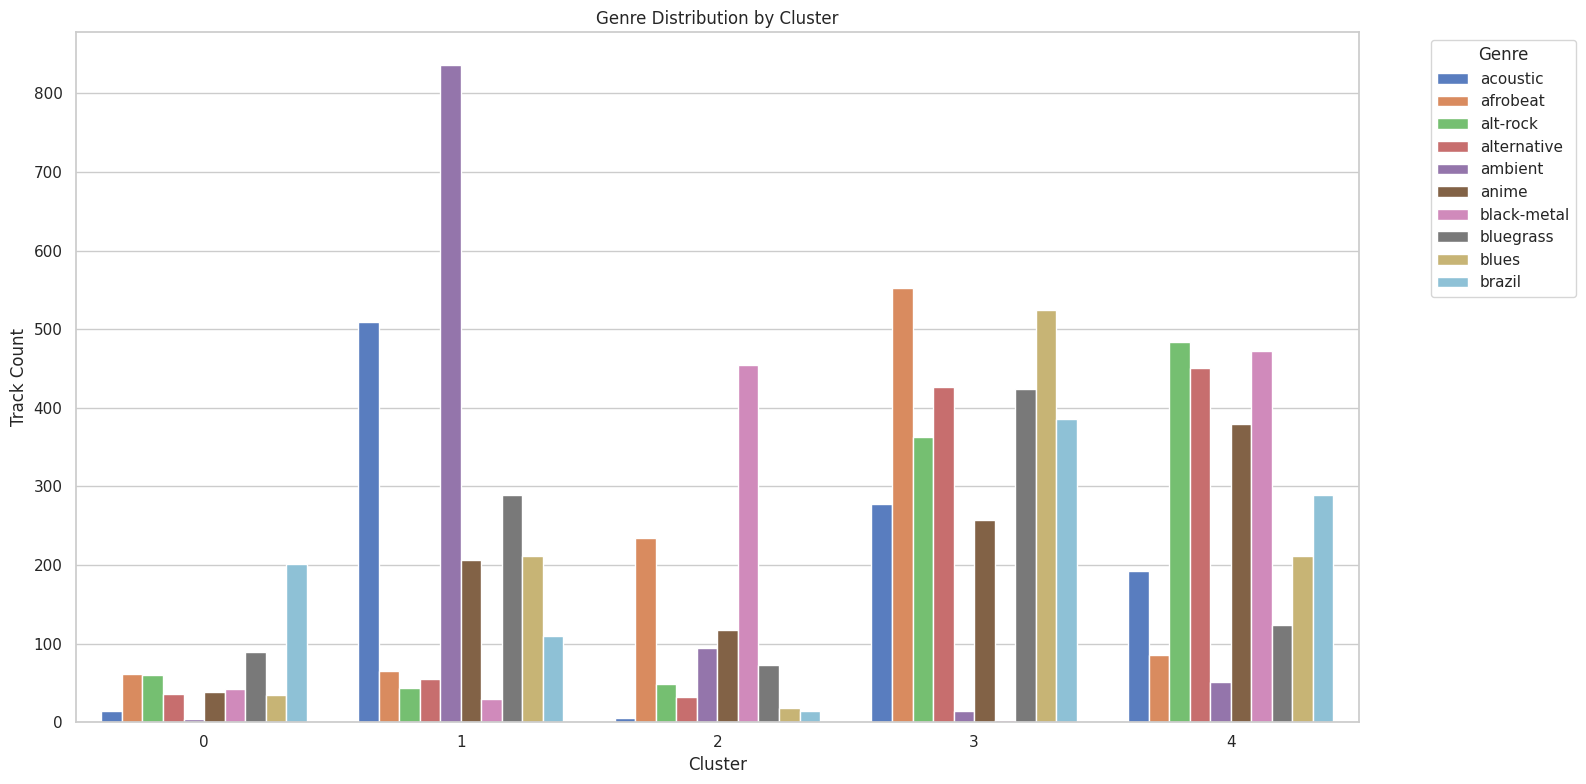

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set plot aesthetics
sns.set(style="whitegrid", palette="muted")

# Get top N genres for clarity
top_genres = df['track_genre'].value_counts().head(10).index
filtered_df = df[df['track_genre'].isin(top_genres)]

# Plot genre distribution per cluster
plt.figure(figsize=(16, 8))
sns.countplot(data=filtered_df, x='cluster', hue='track_genre')

plt.title('Genre Distribution by Cluster')
plt.xlabel('Cluster')
plt.ylabel('Track Count')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


## Genre Distribution per Cluster

/tmp/ipython-input-15-2944651472.py:10: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


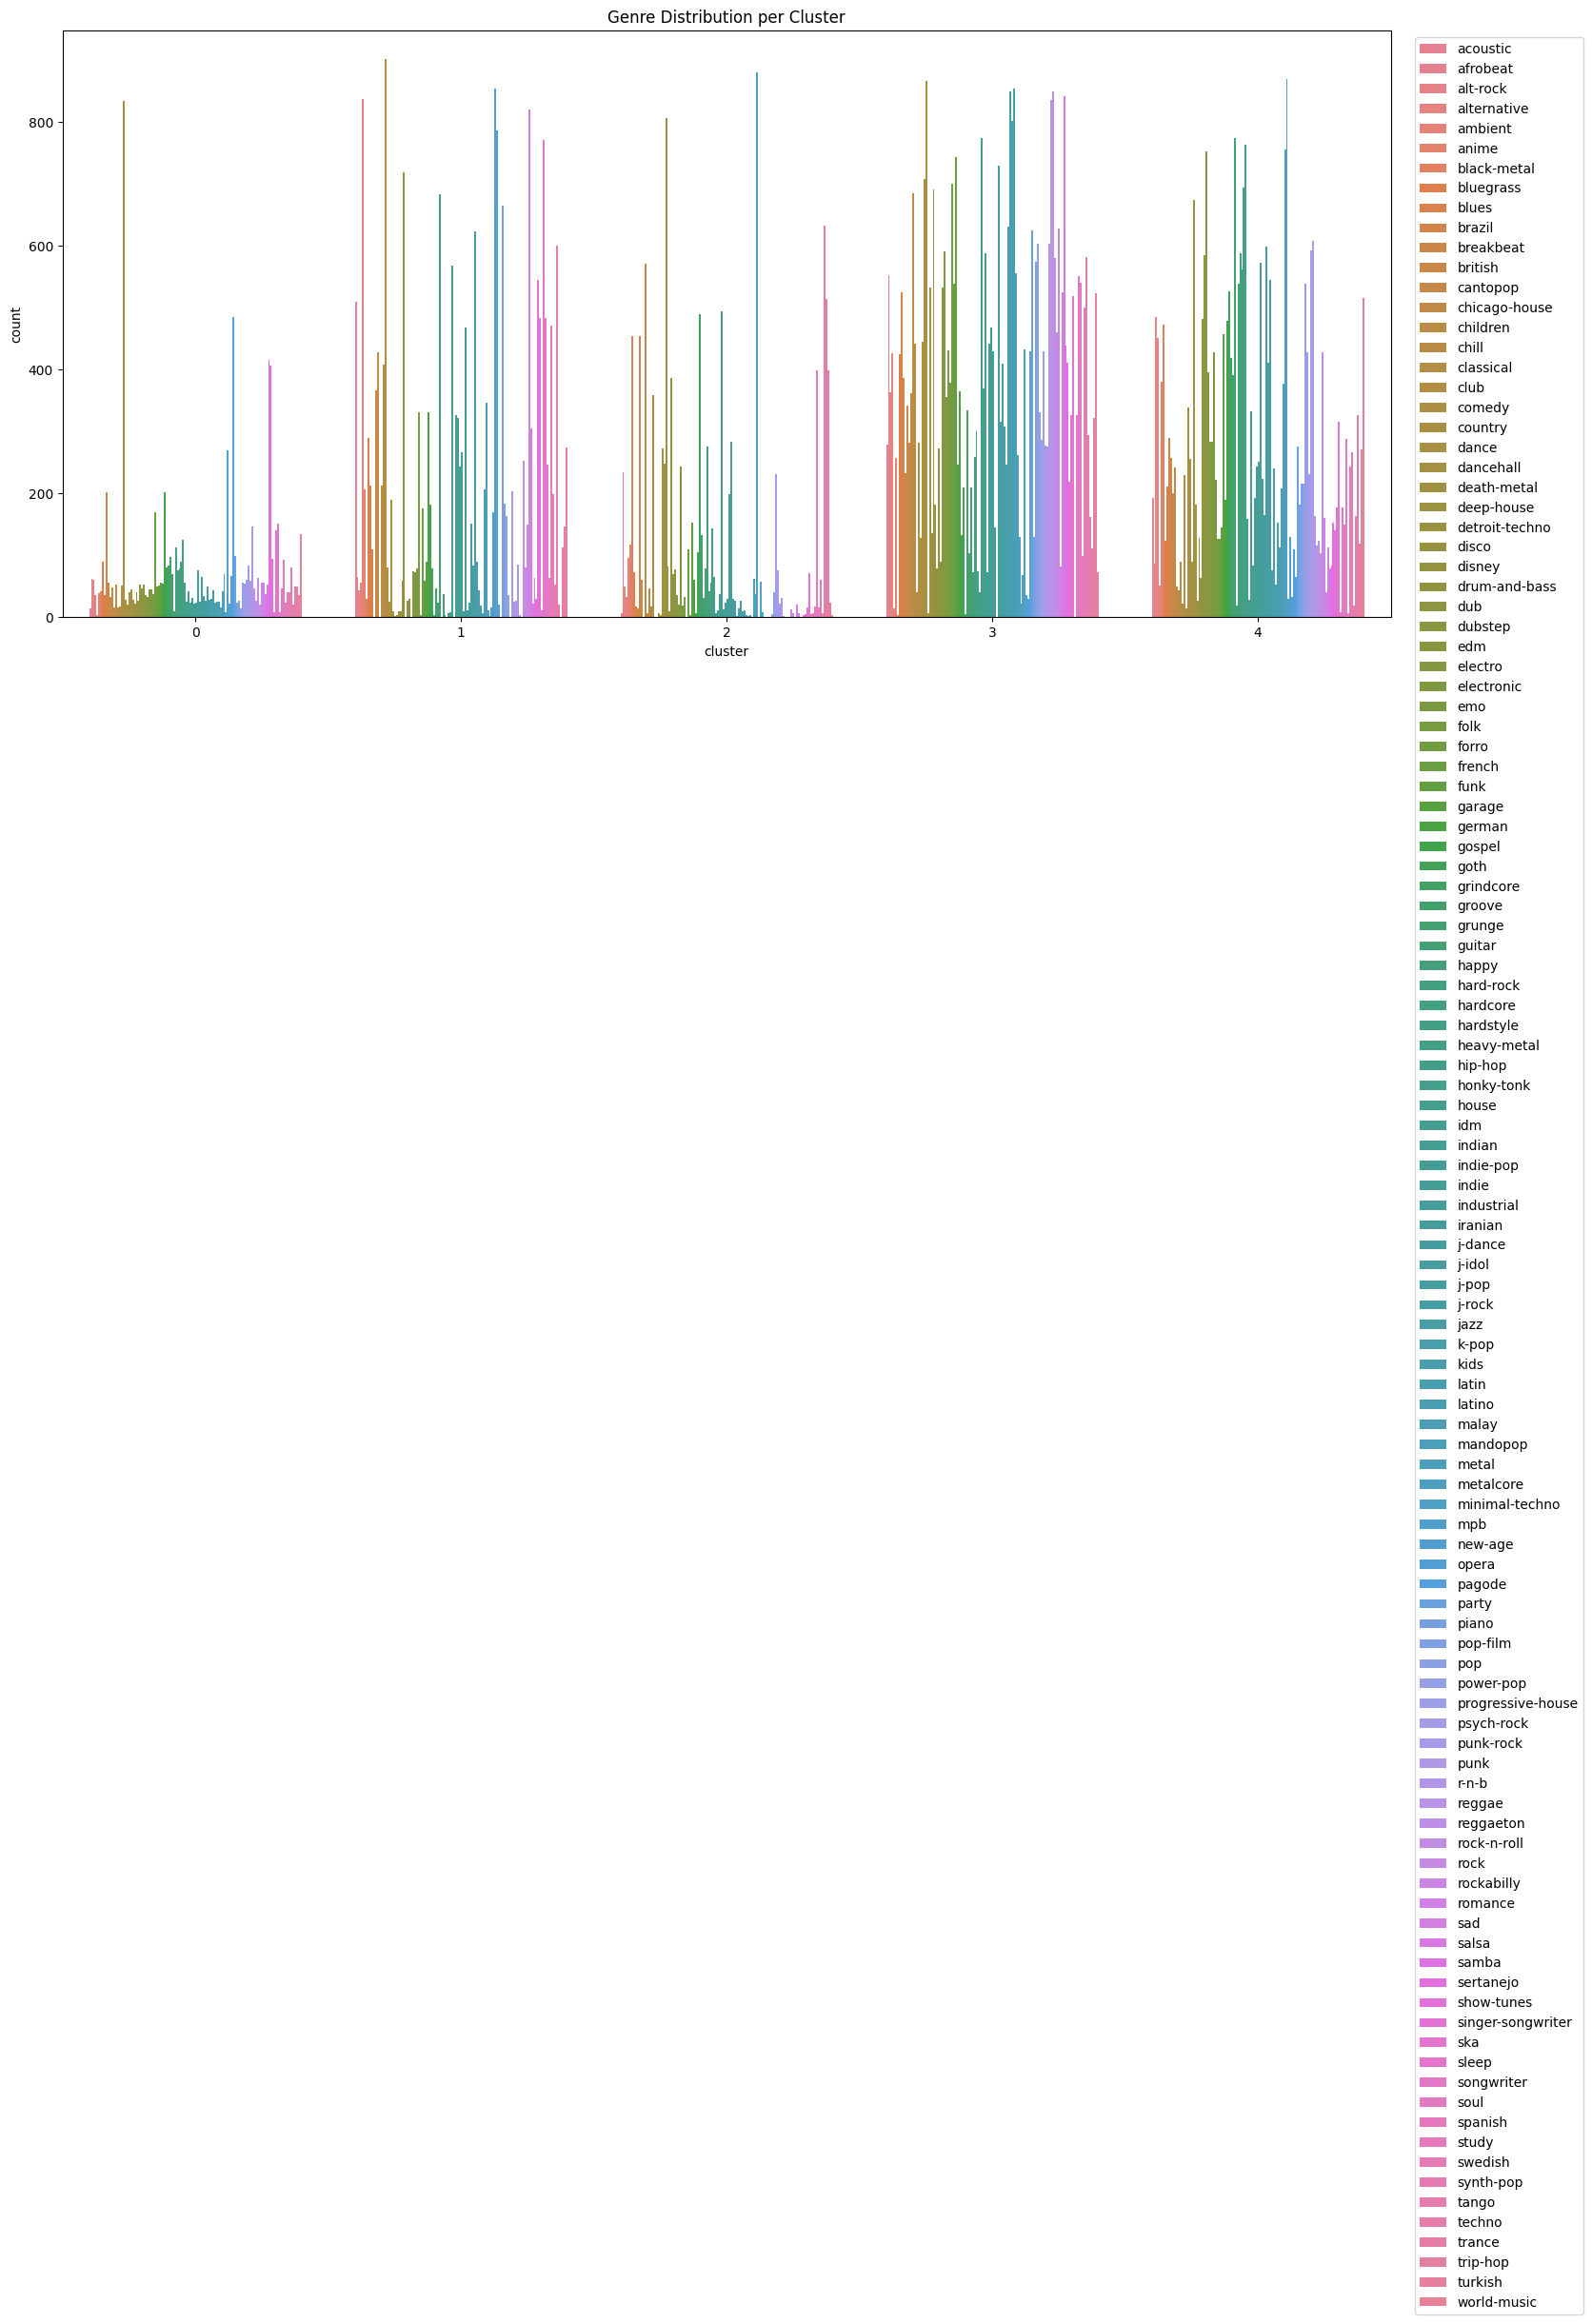

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Genre distribution per cluster
plt.figure(figsize=(18, 8))
sns.countplot(data=df, x='cluster', hue='track_genre', order=sorted(df['cluster'].unique()))
plt.title('Genre Distribution per Cluster')
plt.xticks(rotation=0)
plt.legend(loc='upper right', bbox_to_anchor=(1.15, 1))
plt.tight_layout()
plt.show()

## Clustering Analysis
##Objective:
Identify natural groupings of tracks based on audio features.

##Approach:

Applied KMeans (k=5) and DBSCAN on scaled audio features.

Evaluated cluster quality using Silhouette Score:

KMeans: 0.155

DBSCAN: 0.366

Chose KMeans for final labeling to maintain consistent cluster groups in the dataset.

##Visualization:

Used t-SNE and 3D PCA to explore structure of clusters.

Observed meaningful grouping:

Cluster 0: Dense & cohesive — likely a core genre.

Cluster 1: Clearly separated — possibly another strong genre.

Cluster 2: Mixed — valid core + scattered outliers.

Cluster 3: Best seen in 3D — confirms need for dimensionality reduction.

Cluster 4: Small, niche — rare genre types.

##Conclusion:
The clusters captured meaningful musical groupings and were used as additional signals in genre classification and recommendation system.